# Tasks for laboratory assignment 3

In [2]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


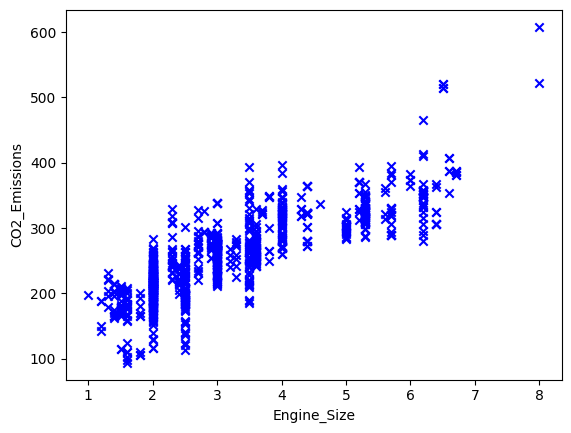

In [3]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [4]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    df = pd.read_csv(file_path)
    return df.astype(str).agg(','.join, axis=1).tolist()

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

['63,1,3,145,233,1,0,150,0,2.3,0,0,1,1', '37,1,2,130,250,0,1,187,0,3.5,0,0,2,1', '41,0,1,130,204,0,0,172,0,1.4,2,0,2,1', '56,1,1,120,236,0,1,178,0,0.8,2,0,2,1', '57,0,0,120,354,0,1,163,1,0.6,2,0,2,1', '57,1,0,140,192,0,1,148,0,0.4,1,0,1,1', '56,0,1,140,294,0,0,153,0,1.3,1,0,2,1', '44,1,1,120,263,0,1,173,0,0.0,2,0,3,1', '52,1,2,172,199,1,1,162,0,0.5,2,0,3,1', '57,1,2,150,168,0,1,174,0,1.6,2,0,2,1', '54,1,0,140,239,0,1,160,0,1.2,2,0,2,1', '48,0,2,130,275,0,1,139,0,0.2,2,0,2,1', '49,1,1,130,266,0,1,171,0,0.6,2,0,2,1', '64,1,3,110,211,0,0,144,1,1.8,1,0,2,1', '58,0,3,150,283,1,0,162,0,1.0,2,0,2,1', '50,0,2,120,219,0,1,158,0,1.6,1,0,2,1', '58,0,2,120,340,0,1,172,0,0.0,2,0,2,1', '66,0,3,150,226,0,1,114,0,2.6,0,0,2,1', '43,1,0,150,247,0,1,171,0,1.5,2,0,2,1', '69,0,3,140,239,0,1,151,0,1.8,2,2,2,1', '59,1,0,135,234,0,1,161,0,0.5,1,0,3,1', '44,1,2,130,233,0,1,179,1,0.4,2,0,2,1', '42,1,0,140,226,0,1,178,0,0.0,2,0,2,1', '61,1,2,150,243,1,1,137,1,1.0,1,0,2,1', '40,1,3,140,199,0,1,178,1,1.4,2,0,3,1',

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

['2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3', '2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3', '2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6', '2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6', '2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7', '2021,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,11.3,8.1,9.8,231,7', '2021,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,10.0,7.2,8.7,205,3', '2021,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,10.5,7.7,9.2,217,3', '2021,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,13.5,9.3,11.6,271,3', '2021,Alfa Romeo,Stelvio,SUV: Small,2.0,4,A8,10.3,8.1,9.3,218,3']


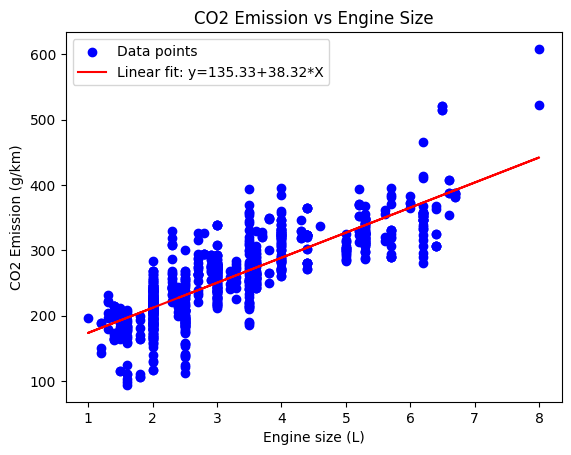

[np.float64(135.3260546026322), np.float64(38.32301106042744)]


In [6]:
def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    rows = [row.split(',') for row in data]

    # Витягаємо Engine_size та CO2Emission
    X = np.array([float(row[4]) for row in rows]).reshape(-1, 1)
    y = np.array([float(row[10]) for row in rows])

    # Будуємо модель лінійної регресії
    model = LinearRegression()
    model.fit(X, y)

    # Отримуємо параметри theta
    theta_0 = model.intercept_
    theta_1 = model.coef_[0]

    # Візуалізація
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, model.predict(X), color='red', label=f'Linear fit: y={theta_0:.2f}+{theta_1:.2f}*X')
    plt.xlabel('Engine size (L)')
    plt.ylabel('CO2 Emission (g/km)')
    plt.title('CO2 Emission vs Engine Size')
    plt.legend()
    plt.show()

    return [theta_0, theta_1]

data = extract_texts_from_file('resources/CO2_emission.csv')
print(data[:10])
print(CO2_emissions(data))

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

['-4.662262677220208,41.84298632027783', '-4.316559446725467,34.661119537360236', '-4.213984764590729,39.38300087682567', '-3.9496610890515704,37.53984488250128', '-3.578553716228682,32.28453118789761', '-3.455711698065576,30.00113847641735', '-3.108440120890996,22.63540127701263', '-3.081303324303456,25.36502221208036', '-2.672460827006454,19.22697004825409', '-2.652286792936049,20.27967917842273']


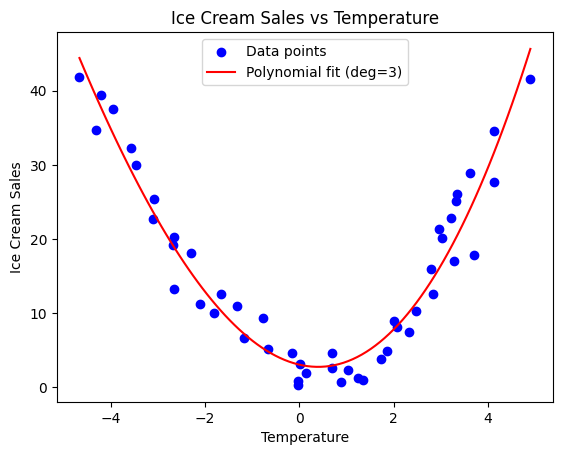

[np.float64(3.0613730173391502), -1.4809035312338668, 1.824312099540443, 0.05141274165993029]


In [7]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    rows = [row.split(',') for row in data]

    X = np.array([float(row[0]) for row in rows]).reshape(-1, 1)
    y = np.array([float(row[1]) for row in rows])

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    theta_list = [model.intercept_] + model.coef_[1:].tolist()

    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))

    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X_fit, y_fit, color='red', label='Polynomial fit (deg=3)')
    plt.xlabel('Temperature')
    plt.ylabel('Ice Cream Sales')
    plt.title('Ice Cream Sales vs Temperature')
    plt.legend()
    plt.show()

    return theta_list

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
print(data[:10])
print(ice_cream_selling(data))

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

['1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386', '1/1/2017 0:10,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434', '1/1/2017 0:20,6.313,74.5,0.08,0.062,0.1,29128.10127,19006.68693,19668.43373', '1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711', '1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.6962,17872.34043,18442.40964', '1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048', '1/1/2017 1:00,5.641,77.7,0.08,0.048,0.096,25998.98734,16993.31307,17945.06024', '1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711', '1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217', '1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687']


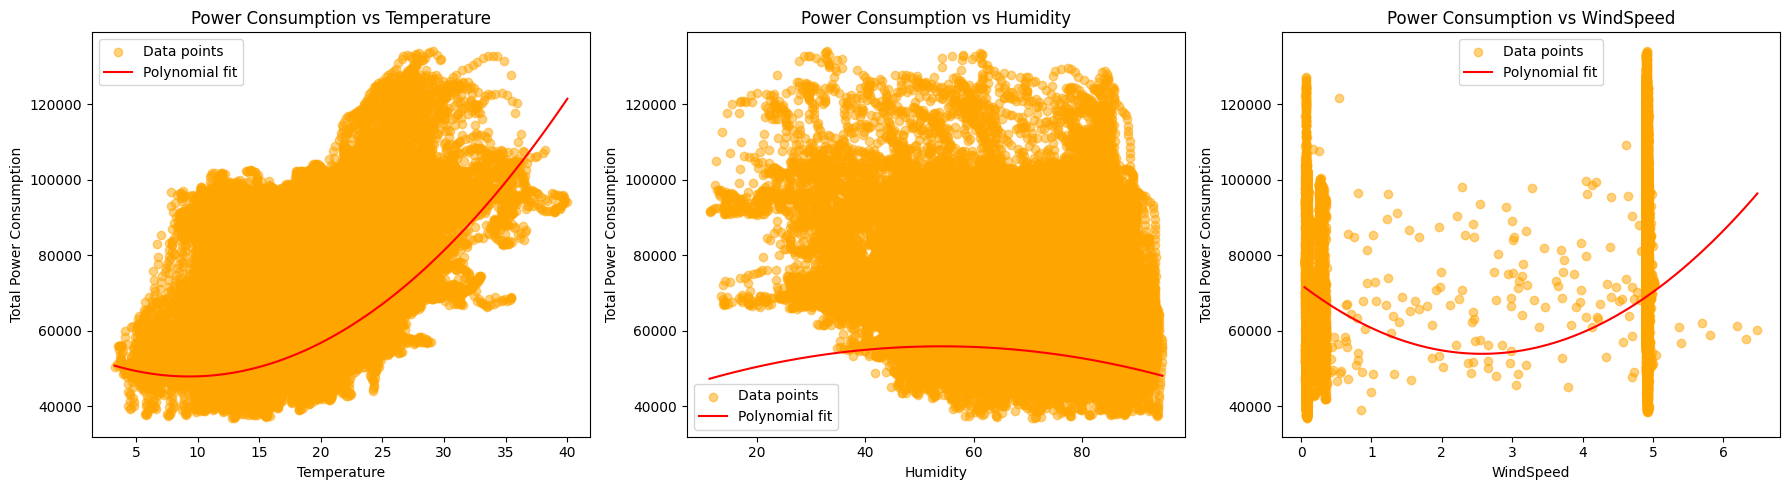

[np.float64(97180.01567012728), -3674.400796132216, 0.35686064978588816, -14065.292130800526, 78.11773664665864, 29.935957462512857, 89.63566636478896, -4.705067833948035, -27.828369027175814, 2776.5840408661147]


In [20]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    rows = [row.split(',') for row in data]

    X = np.array([[float(row[1]), float(row[2]), float(row[3])] for row in rows])

    y = np.array([float(row[6]) + float(row[7]) + float(row[8]) for row in rows])

    poly = PolynomialFeatures(degree=2, include_bias=True)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    theta_list = [model.intercept_] + model.coef_[1:].tolist()

    features = ['Temperature', 'Humidity', 'WindSpeed']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, ax in enumerate(axes):
        X_plot = np.linspace(X[:,i].min(), X[:,i].max(), 100)
        X_plot_full = np.column_stack([
            X_plot if j == i else np.full_like(X_plot, X[:,j].mean())
            for j in range(3)
        ])
        y_plot = model.predict(poly.transform(X_plot_full))

        ax.scatter(X[:,i], y, color='orange', alpha=0.5, label='Data points')
        ax.plot(X_plot, y_plot, color='red', label='Polynomial fit')
        ax.set_xlabel(features[i])
        ax.set_ylabel('Total Power Consumption')
        ax.set_title(f'Power Consumption vs {features[i]}')
        ax.legend()

    plt.tight_layout()
    plt.show()

    return theta_list

data = extract_texts_from_file('resources/powerconsumption.csv')
print(data[:10])
print(power_consumption(data))

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

['63,1,3,145,233,1,0,150,0,2.3,0,0,1,1', '37,1,2,130,250,0,1,187,0,3.5,0,0,2,1', '41,0,1,130,204,0,0,172,0,1.4,2,0,2,1', '56,1,1,120,236,0,1,178,0,0.8,2,0,2,1', '57,0,0,120,354,0,1,163,1,0.6,2,0,2,1', '57,1,0,140,192,0,1,148,0,0.4,1,0,1,1', '56,0,1,140,294,0,0,153,0,1.3,1,0,2,1', '44,1,1,120,263,0,1,173,0,0.0,2,0,3,1', '52,1,2,172,199,1,1,162,0,0.5,2,0,3,1', '57,1,2,150,168,0,1,174,0,1.6,2,0,2,1']
Train Accuracy: 0.864
Validation Accuracy: 0.852


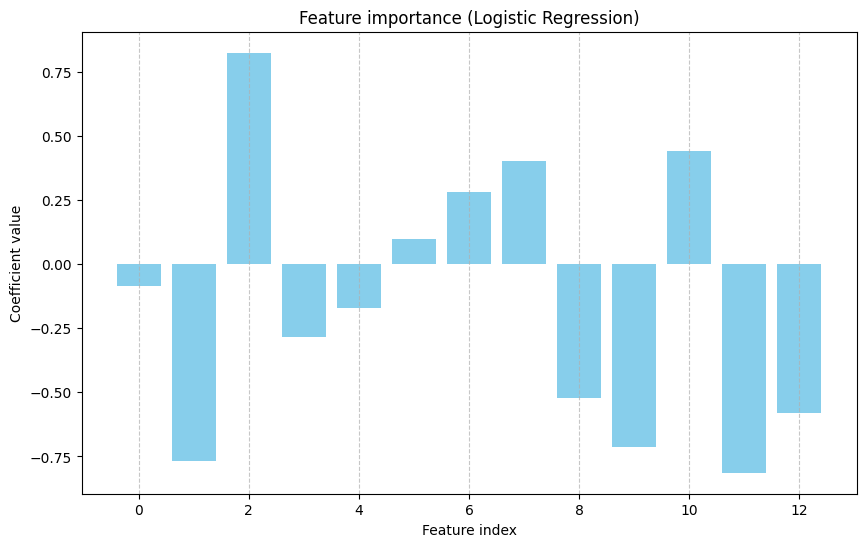

[np.float64(-0.012385469143423082), -0.08578323718641687, -0.7688782431451524, 0.8244065810840909, -0.28404018966753497, -0.1723819824059919, 0.09632823462026485, 0.2808840465394173, 0.40359685613385543, -0.5231500285983341, -0.7123108945809518, 0.44282487569972034, -0.8134704722919104, -0.5810883942406807]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack. 
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    rows = [list(map(float, row.split(','))) for row in data]
    arr = np.array(rows)

    X = arr[:, :-1]
    y = arr[:, -1]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    print(f'Train Accuracy: {accuracy_score(y_train, model.predict(X_train)):.3f}')
    print(f'Validation Accuracy: {accuracy_score(y_val, model.predict(X_val)):.3f}')

    coef = model.coef_[0]
    plt.figure(figsize=(10,6))
    plt.bar(range(len(coef)), coef, color='skyblue')
    plt.xlabel('Feature index')
    plt.ylabel('Coefficient value')
    plt.title('Feature importance (Logistic Regression)')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    theta_list = [model.intercept_[0]] + coef.tolist()
    return theta_list

data = extract_texts_from_file('resources/heart.csv')
print(data[:10])
print(heart_classification(data))

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.